In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
# Imports
import pandas as pd
from src.debate_manager import DebateManager
from src.debate_processor import process_debate
from src.visualization import graph_scene_graph, graph_all_scene_graphs
from src.utils import save_results, calculate_rmse, generate

In [3]:
# Loading DebateArt

# Load the CSV file
file_path = 'data/panel_bench/DebateArt/gold/dimension.csv'
df = pd.read_csv(file_path)

# Extract the dart_id column and format it
dart_ids = list(dict.fromkeys(df['dart_id'].apply(lambda x: f"{x:04d}").tolist()))

# Loading Manager
manager = DebateManager("config/data_config.yaml", debate_format="debateart")

# Print the formatted dart_ids
print(dart_ids)
print(len(dart_ids))

Loaded Config: {'datasets': {'bp_competition': {'data_dir': 'data/panel_bench/BP-Competition', 'formats': {'motion': 'motion/bp_{id}.yml', 'speech': 'speech/bp_{id}.yml'}}, 'debateart': {'data_dir': 'data/panel_bench/DebateArt', 'formats': {'motion': 'motion/debateart_{id}.yml', 'speech': 'speech/debateart_{id}.yml'}}}}
['0017', '0020', '0130', '0204', '0244', '0290', '0309', '0386', '0466', '0495', '0537', '0566', '0569', '0570', '0578', '0600', '0601', '0616', '0654', '0678', '0679', '0684', '0716', '0731', '0734', '0737', '0750', '0752', '0756', '0769', '0777', '0778', '0796', '0802', '0840', '0866', '0892', '0905', '0931', '0943', '0951', '0956', '0959', '0962', '0987', '0994', '1033', '1043', '1079', '1080', '3638', '3645', '3687', '3696', '3817', '3842', '3867', '3919', '3935', '3943', '3965', '3986', '4005', '4024', '4038', '4066', '4085', '4123', '4286', '4287', '4367', '4374', '4389', '4395', '4398', '4423', '4509', '4562', '4567', '4573', '4617', '4620', '4638', '4640', '4642

In [21]:
# Testing First N Debates
N = 1
winners = []
structs = []

for dart_id in dart_ids[:N]:
    debate = manager.load_debate(dart_id)
    winner, struct = process_debate(debate)
    winners.append(winner)
    structs.append(struct)

print(winners)

['con']


<module 'matplotlib.pyplot' from 'c:\\Users\\12700K\\miniconda3\\envs\\debate\\Lib\\site-packages\\matplotlib\\pyplot.py'>

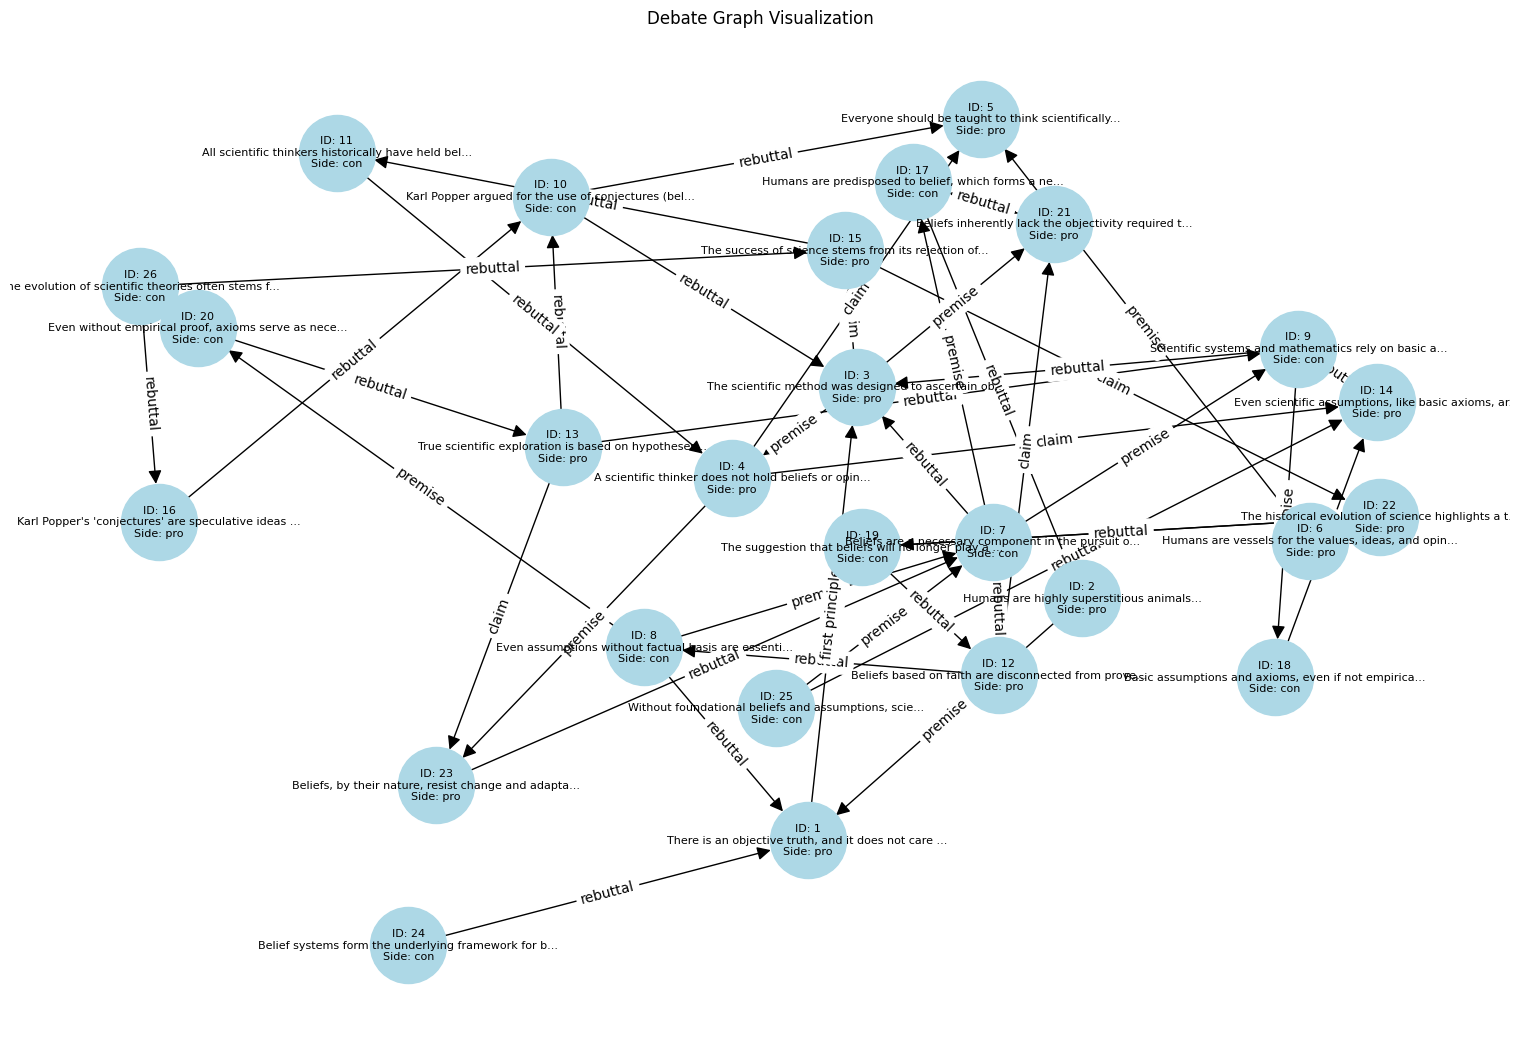

In [22]:
# Graphing results

# View final graph for first debate
graph_scene_graph(structs[0]['graph_history'][-1])

Scene Graph 1:
Scene Graph 2:
Scene Graph 3:
Scene Graph 4:
Scene Graph 5:
Scene Graph 6:


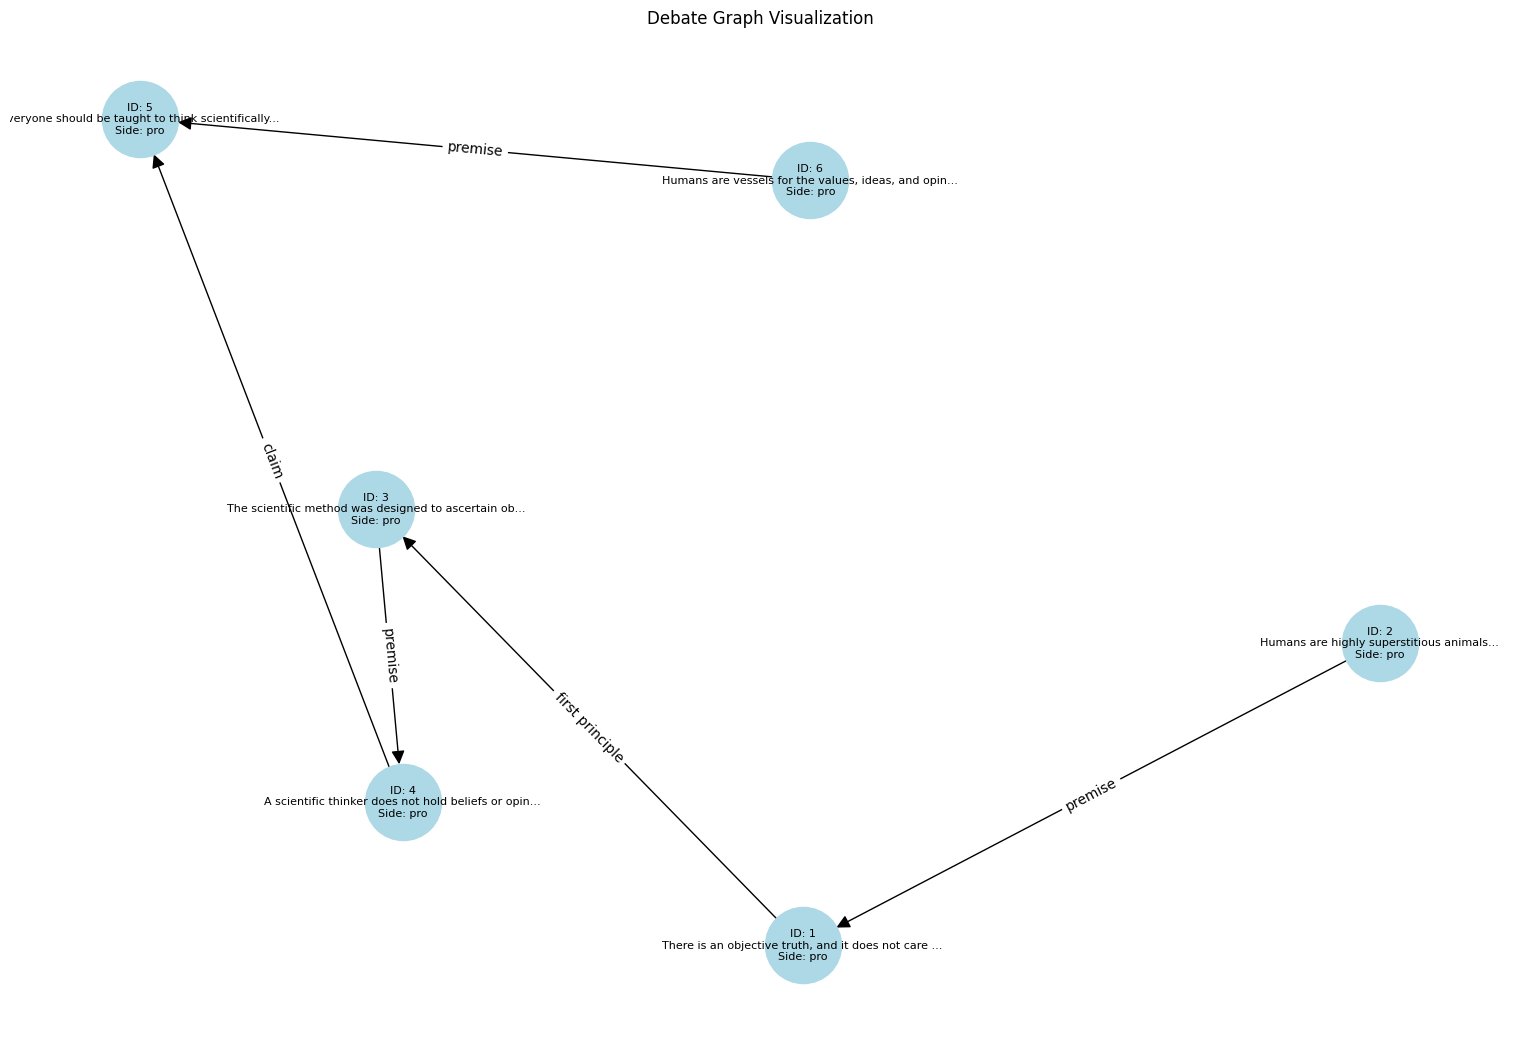

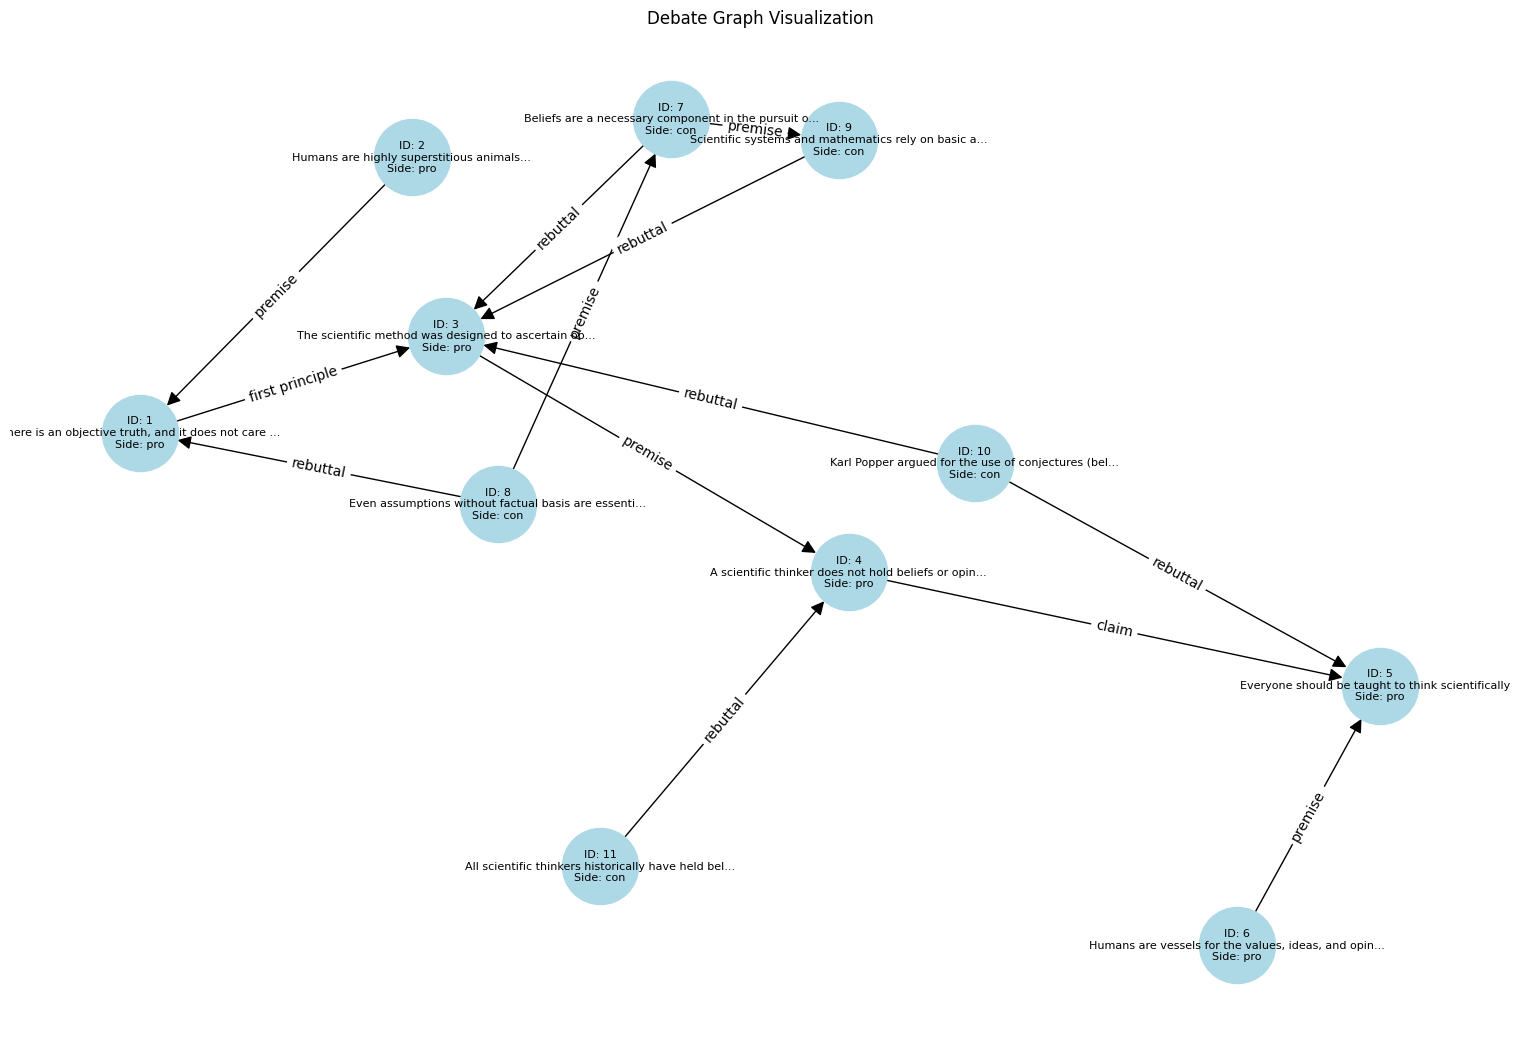

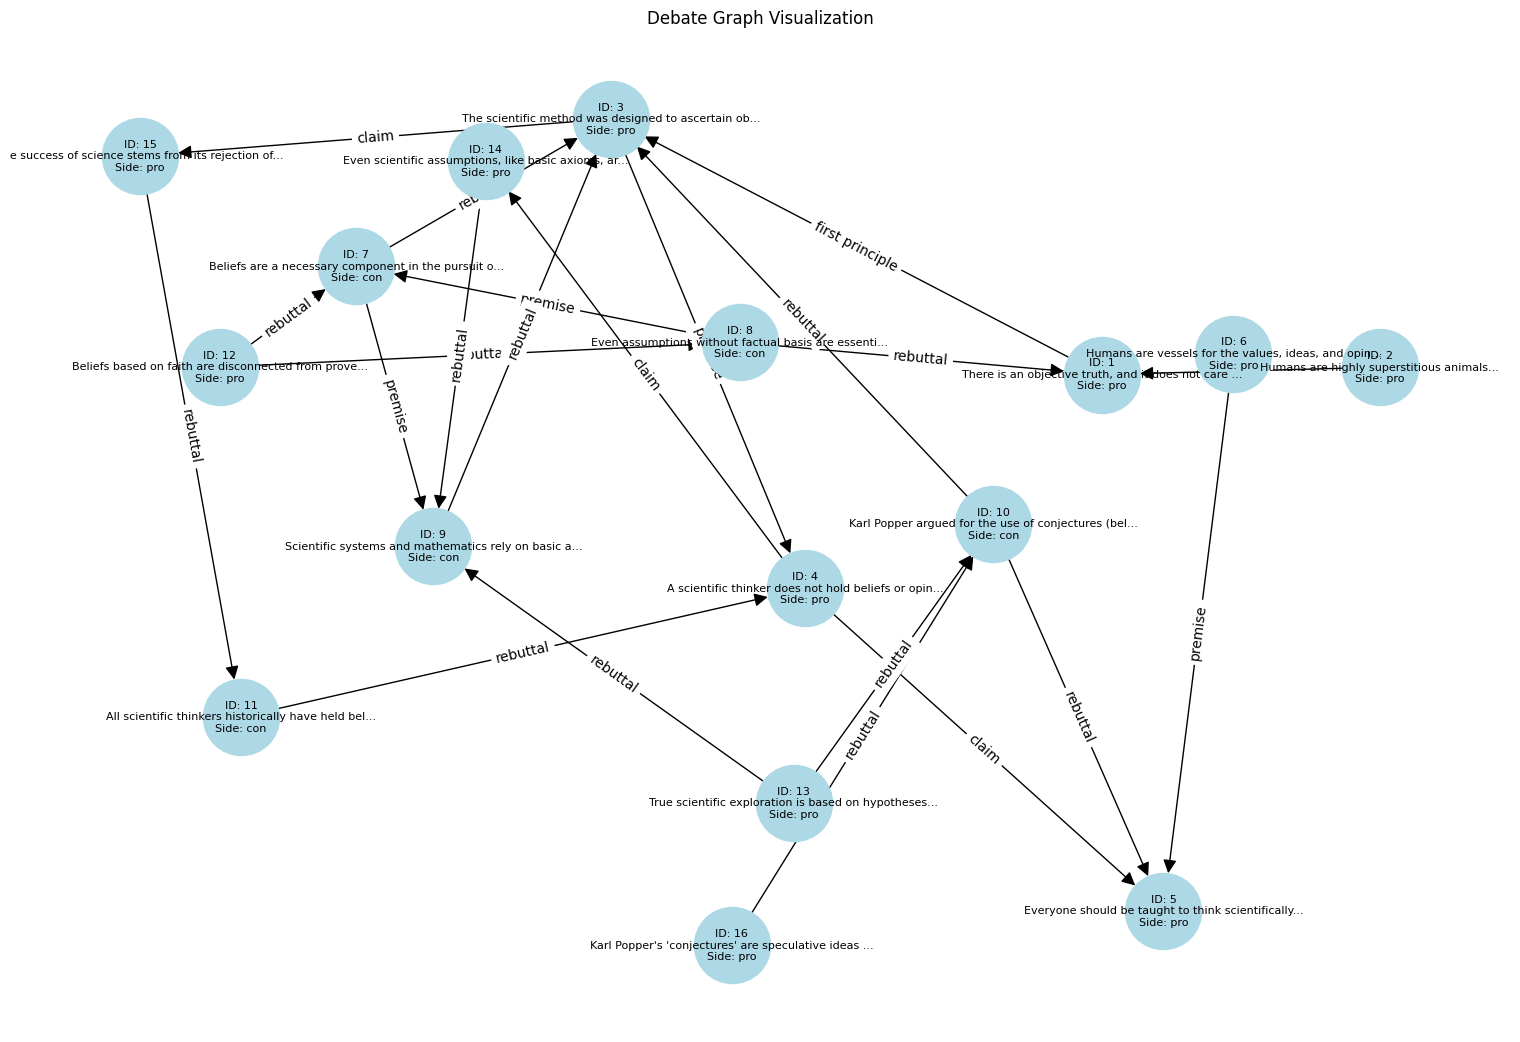

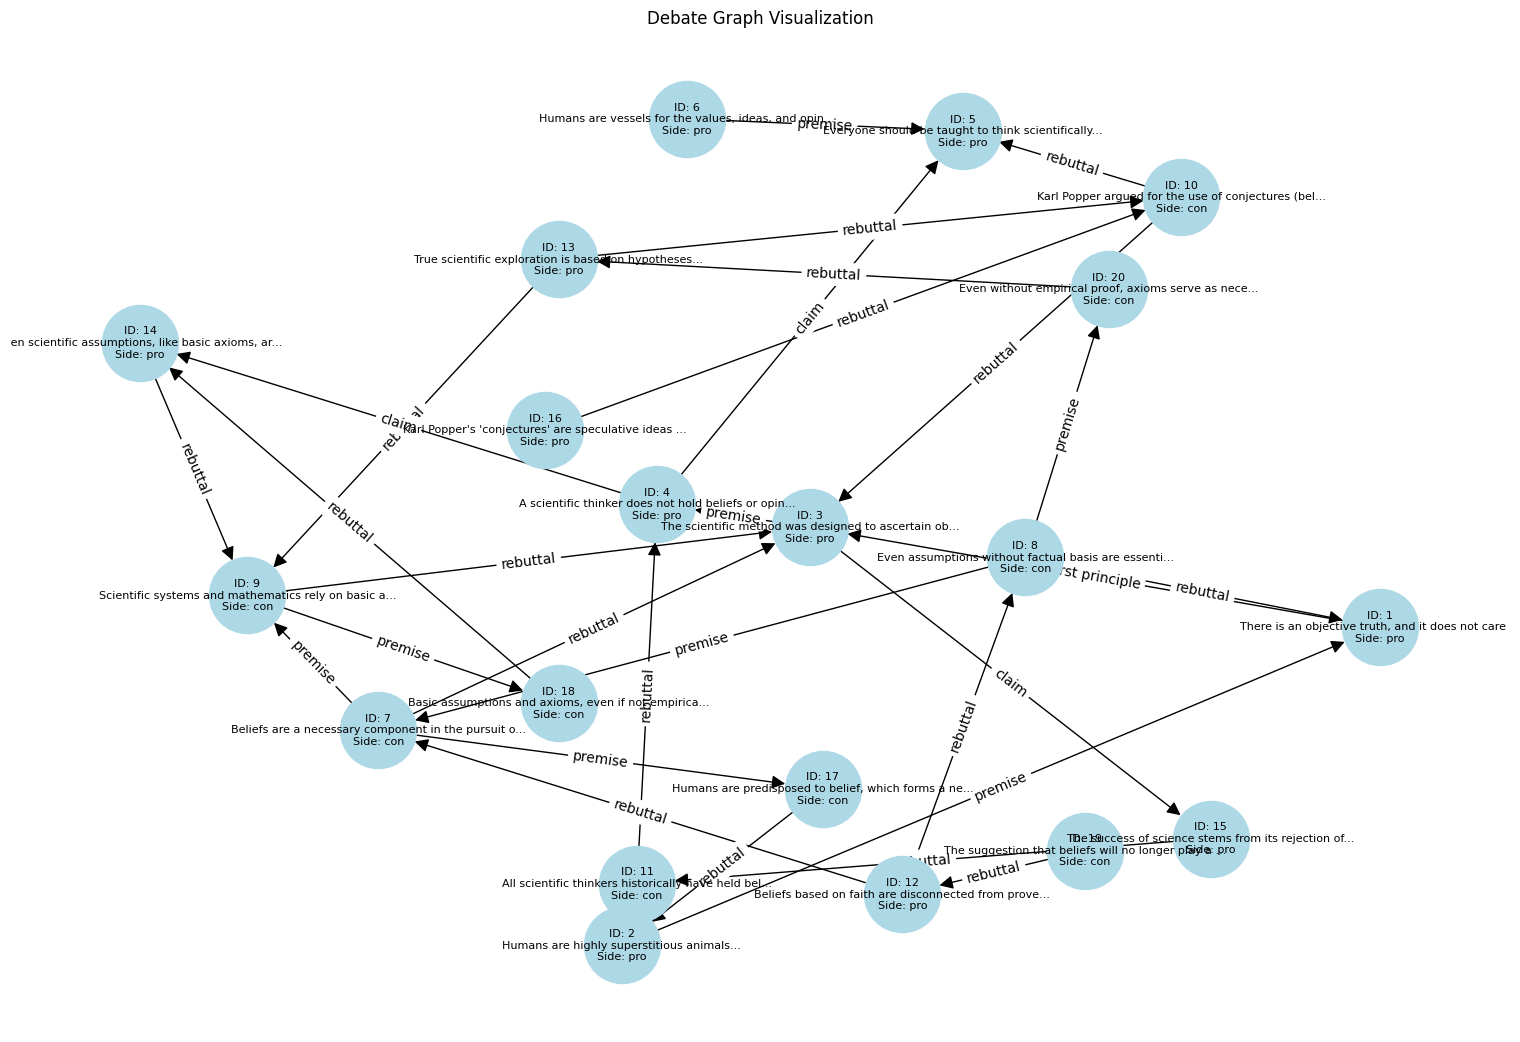

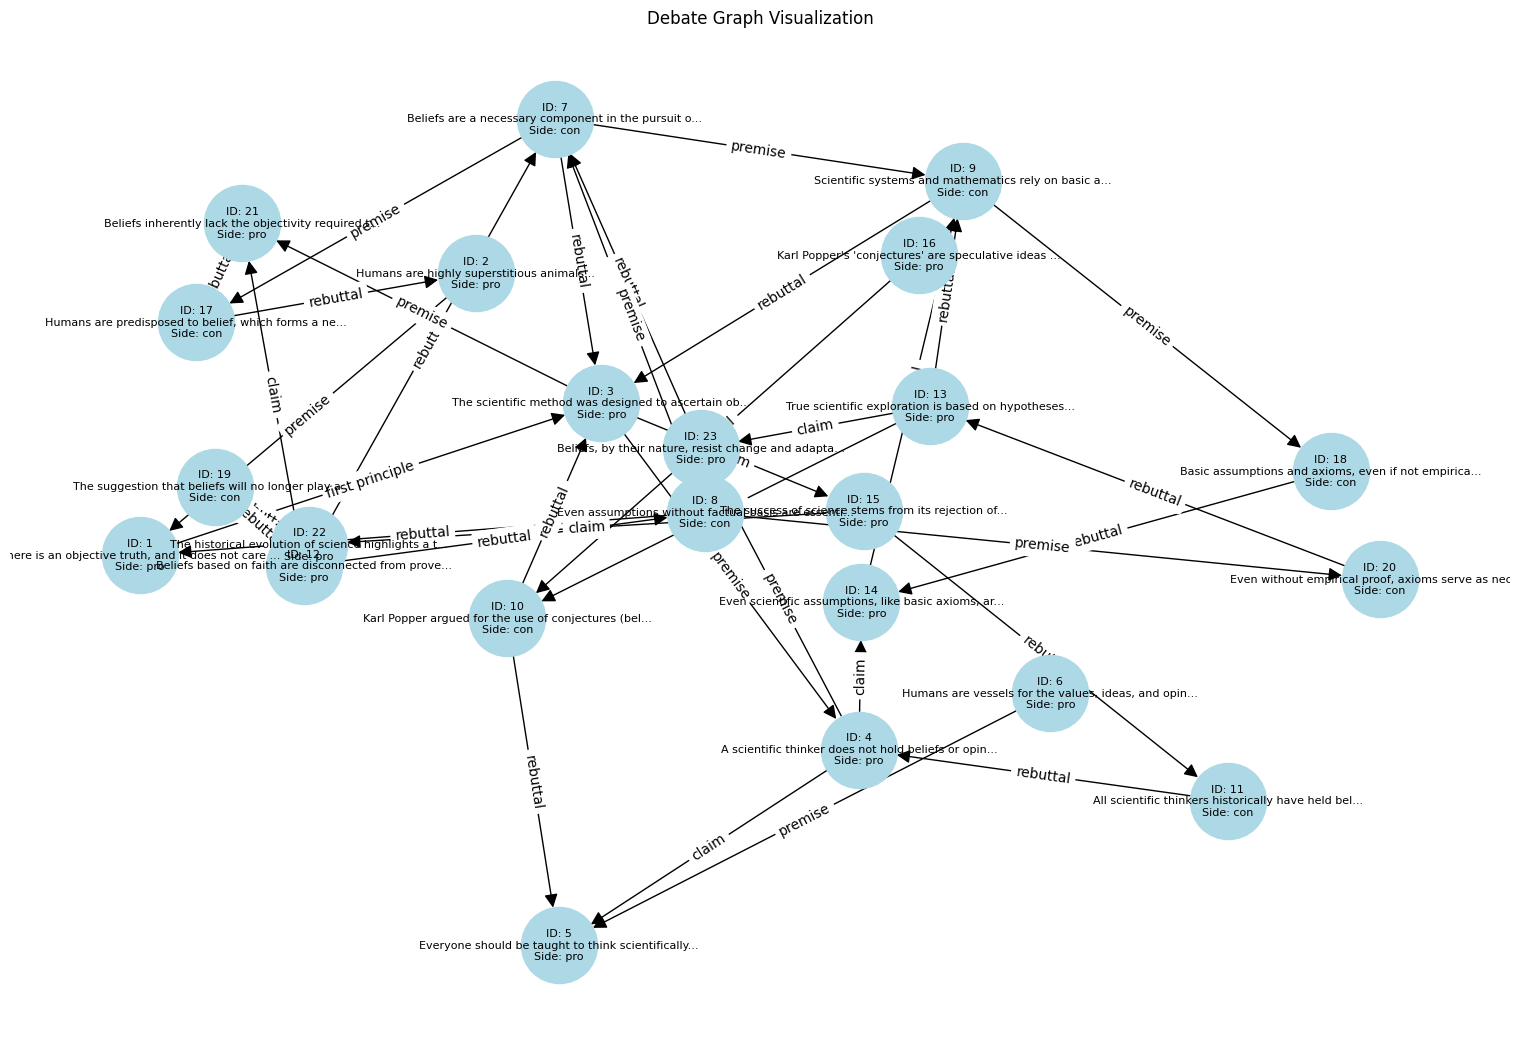

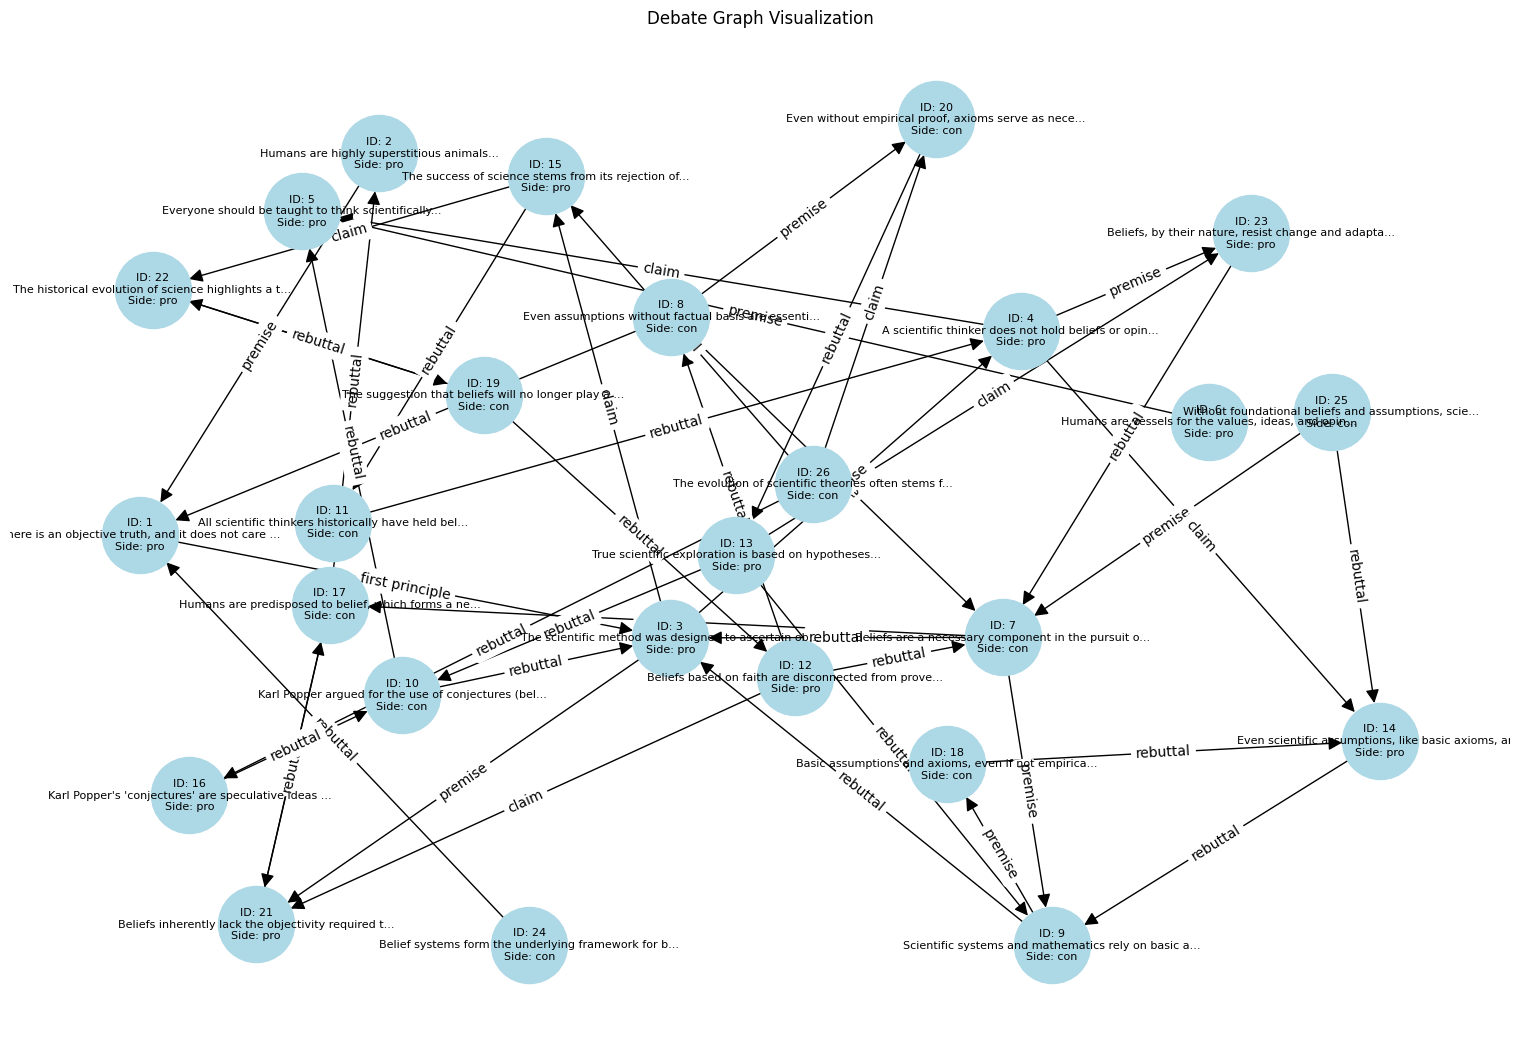

In [23]:
# Graphing evolution of debate graph
graph_all_scene_graphs(structs[0]['graph_history'])

In [ ]:
# Running on DebateArt
winners = {}
structs = {}
batch_number = 0
for i, dart_id in enumerate(dart_ids):
    try:
        debate = manager.load_debate(dart_id)
        winner, struct = process_debate(debate)
        winners[dart_id] = winner
        structs[dart_id] = struct
        print(f"Processed debate ID {dart_id}")
        print(f"i: {i}")
        print(f"Winner: {winner}")

        if (i + 1) % 10 == 0:
            batch_number += 1
            save_results(winners, structs, batch_number)
    except Exception as e:
        print(f"Error processing debate ID {dart_id}: {e}")
        continue

print(winners)

In [ ]:
# Benchmarking
ground_truth = {}
for dart_id in winners.keys():
    ground_truth[dart_id] = df.loc[(df['dart_id'] == int(dart_id)) & (df['dimension'] == 'argument')]['label'].values[0]

winners_float = {}
for dart_id in winners.keys():
    if winners[dart_id] == "pro":
        winners_float[dart_id] = 0.0
    elif winners[dart_id] == "con":
        winners_float[dart_id] = 1.0
    else:
        winners_float[dart_id] = 0.5
winners_float

gt = list(ground_truth.values())
wf = list(winners_float.values())
calculate_rmse(gt, wf)